# Optimal Physical Distancing At Venues
This python notebook demonstrates a possible approach to optimize the seating arrangement at venues to maximize the number of seats available while ensuring that some defined safe distance is obeyed.

In [53]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

## Specify The Constraints For Safe Distancing
In this case we use a 1m radius as the constraint. Seats should not be placed closer than 1 m.

In [54]:
# Constraints and Constants used
# 1 m safe radius
SAFE_DISTANCE = 1

## Specify The Seating Layout
The layout should be specified in absolute distances each seat should is essentially a $(x,y)$ coordinate where $x$ and $y$ is the distance in meters. For simple demonstration purposes we use a simple square grid.

We plot the seating arrangement to see how it looks like below

In [55]:
# Data 
# (x pos in meters  y pos in meters)

# Simple square grid for demonstration
# It will be necessary to setup the data manually for more complex configurations
data = [[x, y] for x in range(10) for y in range(10)]
data_arr = np.array(data)

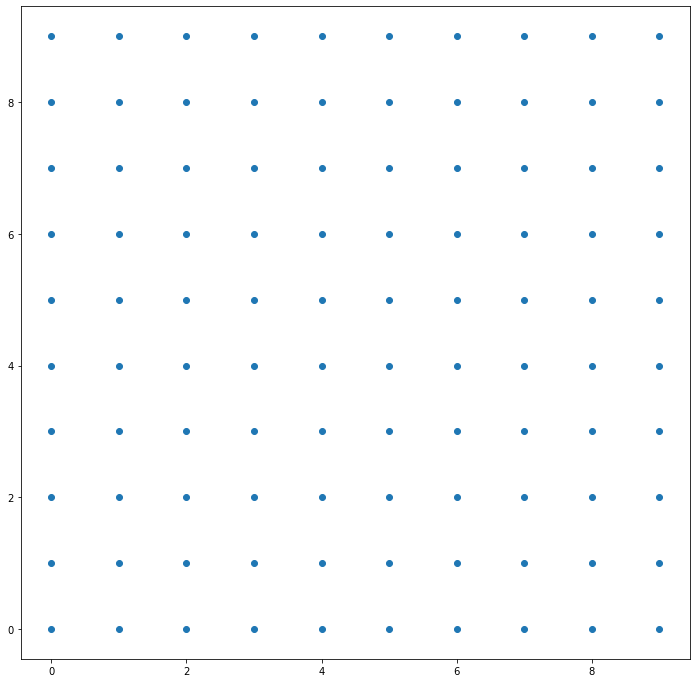

In [56]:
# Visualize Initial Distribution
x, y = data_arr.T
plt.figure(figsize=(12,12))
plt.scatter(x, y)

## The Algorithm
We use a simple random algorithm to optimize the seating layout. The algorithm may not ensure that you find a global optimum but it's very likely that you will find a decent enough solution. To think of other approaches. 

The algorithm works as follow:
1. Select a random seat, take it as a good seat
1. Select the seats around it that are not in the safe distance, and block them
1. Repeat until the specified number of epochs are finished.

In [57]:
# Core functions

def get_distance(p1, p2):
    """
    p1 and p2 are some n iterable where the first two elements are x_pos and y_pos
    p1 = [x1, y1, ...]
    p2 = [x2, y2, ...]
    
    Returns float distance
    """
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**(0.5)

def random_assignment(d, temp_assigned, temp_not_assigned, temp_capacity):
    """
    Receives current data 
    Assigns a random point to be state 1 = assigned
    Assigns surrounding points <= safe_distance to be state 2 = cannot assign
    """
    random_idx = np.random.choice(len(d), size=1, replace=True)
    random_pt = d[random_idx][0]
    
    # Put the random point into temp_assigned
    if temp_assigned is None:
        temp_assigned = np.array([random_pt])
    else:
        temp_assigned = np.append(temp_assigned, [random_pt], axis=0)
        
    # Remove point from d 
    d = np.delete(d, random_idx, 0)
        
    # Find the points in update_d where distance <= SAFE_DISTANCE
    id_to_del = []
    for idx in range(len(d)):
        pt = d[idx]
        if get_distance(pt, random_pt) <= SAFE_DISTANCE:
            if temp_not_assigned is None:
                temp_not_assigned = np.array([pt])

            else:
                temp_not_assigned = np.append(temp_not_assigned, [pt], axis=0)
            
            id_to_del.append(idx)
            
    d = np.delete(d, id_to_del, 0)
                
    temp_capacity += 1
    
    return d, temp_assigned, temp_not_assigned, temp_capacity

In [58]:
# Main loop
i = 0

# Number of Epochs used for optimization
EPOCHS = 5000

# Initialize Results
best_assigned = None
best_not_assigned = None
best_capacity = 0

while i < EPOCHS:
    # Temp Values
    # Copy arr
    temp_data = np.copy(data_arr)
    temp_assigned = None
    temp_not_assigned = None
    temp_capacity = 0
    
    while len(temp_data) != 0:
        temp_data, temp_assigned, temp_not_assigned, temp_capacity = \
            random_assignment(temp_data, temp_assigned, temp_not_assigned, temp_capacity)
        
#         print("temp_data: \n", temp_data)
#         print("temp_assigned: \n", temp_assigned)
#         print("temp_not_assigned: \n", temp_not_assigned)
#         print("temp_capacity: ", temp_capacity)
    
    
    if temp_capacity > best_capacity:
        best_capacity = temp_capacity
        best_assigned = temp_assigned
        best_not_assigned = temp_not_assigned
        
        print("EPOCH NO: ", i)
        print("Best Capacity: ", best_capacity)
        print("Best Not Assigned: \n", best_not_assigned)
        print("Best Assigned: \n", best_assigned)
        
    i += 1

EPOCH NO:  0
Best Capacity:  38
Best Not Assigned: 
 [[8 6]
 [9 5]
 [9 7]
 [2 0]
 [3 1]
 [4 0]
 [0 0]
 [1 1]
 [5 7]
 [6 6]
 [6 8]
 [7 7]
 [0 8]
 [1 7]
 [1 9]
 [2 8]
 [5 1]
 [6 0]
 [6 2]
 [7 1]
 [0 4]
 [1 3]
 [1 5]
 [2 4]
 [0 1]
 [0 3]
 [1 2]
 [4 4]
 [5 3]
 [5 5]
 [6 4]
 [8 8]
 [0 6]
 [3 6]
 [4 5]
 [4 7]
 [5 6]
 [7 3]
 [8 2]
 [1 6]
 [2 5]
 [2 7]
 [3 4]
 [8 0]
 [2 2]
 [3 3]
 [4 2]
 [9 1]
 [3 9]
 [5 9]
 [7 9]
 [8 3]
 [9 2]
 [9 4]
 [8 9]
 [9 8]
 [6 5]
 [7 4]
 [7 6]
 [8 5]
 [4 8]
 [3 8]]
Best Assigned: 
 [[9 6]
 [3 0]
 [1 0]
 [6 7]
 [1 8]
 [6 1]
 [1 4]
 [0 2]
 [5 4]
 [8 7]
 [0 7]
 [4 6]
 [7 2]
 [2 6]
 [3 5]
 [7 0]
 [3 2]
 [8 1]
 [2 1]
 [4 1]
 [2 9]
 [6 9]
 [0 5]
 [9 3]
 [9 0]
 [0 9]
 [9 9]
 [7 5]
 [5 2]
 [2 3]
 [5 0]
 [4 3]
 [6 3]
 [4 9]
 [8 4]
 [7 8]
 [3 7]
 [5 8]]
EPOCH NO:  3
Best Capacity:  43
Best Not Assigned: 
 [[4 9]
 [5 8]
 [6 9]
 [2 1]
 [3 0]
 [3 2]
 [4 1]
 [5 0]
 [6 1]
 [7 0]
 [2 5]
 [3 4]
 [3 6]
 [4 5]
 [1 6]
 [2 7]
 [4 3]
 [5 2]
 [5 4]
 [6 3]
 [0 3]
 [1 2]
 [1 4]
 [2 3]
 [5 6]


## Results
We can now visualize the optimal seating arrangement which maximizes the capacity subject to safe distancing constraints.

Best Capacity:  48


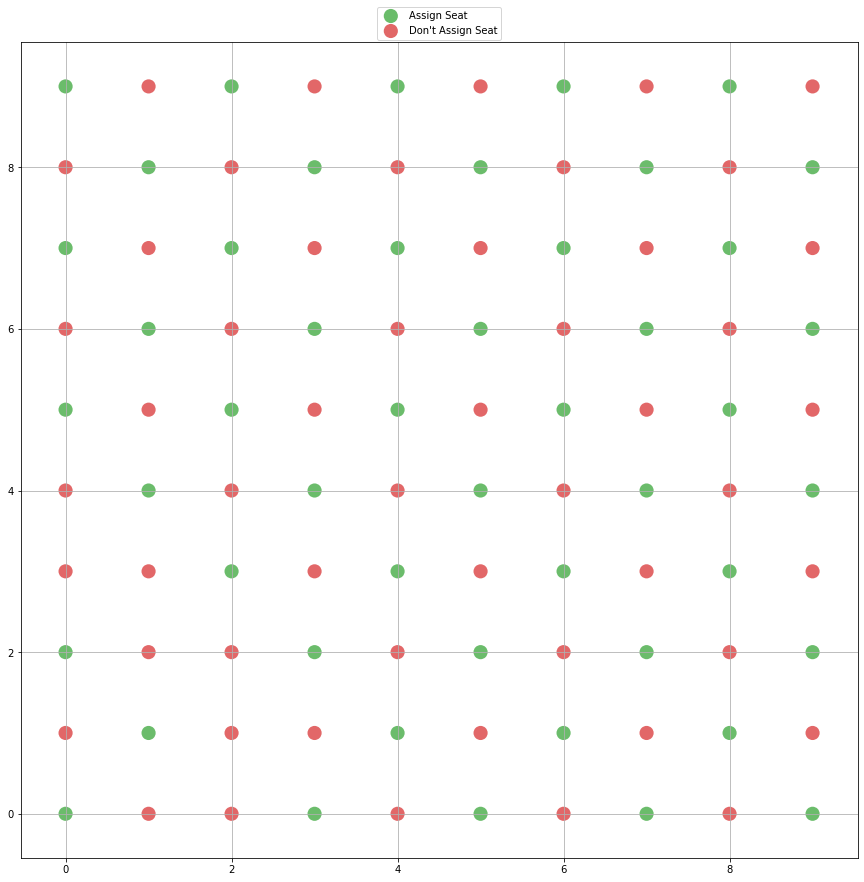

In [59]:
# Visualize final results
x_assigned, y_assigned = best_assigned.T
x_not_assigned, y_not_assigned = best_not_assigned.T

#
# plt.scatter(x_assigned, y_assigned, c="b")
# plt.scatter(x_not_assigned, y_not_assigned, c="r")

fig, ax = plt.subplots(figsize=(15,15))
scale = 200

ax.scatter(x_assigned, y_assigned, 
           c="tab:green", s=scale, label="Assign Seat",
           alpha=0.7, edgecolors='none')
ax.scatter(x_not_assigned, y_not_assigned, 
           c="tab:red", s=scale, label="Don't Assign Seat",
           alpha=0.7, edgecolors='none')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05))
ax.grid(True)

print("Best Capacity: ", best_capacity)
plt.show()